# ***U.S Census At School - Cleaning the Data***
---

### ***Importando las librerías***

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

### ***Cargando los dataframes***

In [2]:
df_ca = pd.read_csv('../data/sample_data/california.csv', encoding='cp1252')

In [3]:
df_fl = pd.read_csv('../data/sample_data/florida.csv', encoding='cp1252')

In [4]:
df_ny = pd.read_csv('../data/sample_data/new_york.csv', encoding='cp1252')

In [5]:
df_tx = pd.read_csv('../data/sample_data/texas.csv', encoding='cp1252')

In [6]:
df_ca

,Country,Region,DataYear,ClassGrade,Gender,Ageyears,Handed,Height_cm,Footlength_cm,Armspan_cm,...,Watching_TV_Hours,Paid_Work_Hours,Work_At_Home_Hours,Schoolwork_Pressure,Planned_Education_Level,Favorite_Music,Superpower,Preferred_Status,Role_Model_Type,Charity_Donation
0,USA,CA,2017,11,Male,16.0,Right-Handed,174,26,170,...,6,0,10,A lot,Undergraduate degree,Pop,Freeze time,Rich,Community leader or elder,Other
1,USA,CA,2014,5,Male,10.0,Right-Handed,146,23,140,...,7,0,7,Very little,Graduate degree,Classical,Invisibility,Happy,Other,Other
2,USA,CA,2017,12,Male,17.0,Right-Handed,180,25,81,...,1,0,6,Very little,Some college,Techno/Electronic,Fly,Happy,Relative,"Wildlife, animals"
3,USA,CA,2023,9,Male,14.0,Right-Handed,173,31,174,...,0,0,7,A lot,Other,Rap/Hip hop,Freeze time,Healthy,Sports person,Health
4,USA,CA,2013,12,Male,17.0,Right-Handed,160,23.5,58,...,10,0,4,Some,Graduate degree,Pop,Super strength,Happy,Religious figure,Religious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,USA,CA,2021,12,Female,16.0,Right-Handed,158,21,153,...,0,0,0,Some,Graduate degree,Pop,Telepathy,Rich,Relative,Environment
496,USA,CA,2022,8,Female,13.0,NaN,5'10,15,20,...,?,?,?,NaN,Other,Other,Invisibility,Healthy,Other,Other
497,USA,CA,2018,8,Female,13.0,Right-Handed,164,32,166,...,4,0,2,Very little,Some college,Pop,Telepathy,Famous,Musician or singer,Other
498,USA,CA,2022,7,Female,12.0,Right-Handed,155,22,153,...,0,0,3,Some,Graduate degree,Other,Telepathy,Rich,Business person,International aid


## **Limpieza y transformación de datos**

### ***Revisando columnas y seleccionando las que se van a usar***

In [7]:
df_ca.columns # Todos los dataframes tienen las mismas columnas

Index(['Country', 'Region', 'DataYear', 'ClassGrade', 'Gender', 'Ageyears',
       'Handed', 'Height_cm', 'Footlength_cm', 'Armspan_cm',
       'Languages_spoken', 'Travel_to_School', 'Travel_time_to_School',
       'Reaction_time', 'Score_in_memory_game', 'Favourite_physical_activity',
       'Importance_reducing_pollution', 'Importance_recycling_rubbish',
       'Importance_conserving_water', 'Importance_saving_energy',
       'Importance_owning_computer', 'Importance_Internet_access',
       'Left_Footlength_cm', 'Longer_foot', 'Index_Fingerlength_mm',
       'Ring_Fingerlength_mm', 'Longer_Finger_Lefthand', 'Birth_month',
       'Favorite_Season', 'Allergies', 'Vegetarian', 'Favorite_Food',
       'Beverage', 'Favorite_School_Subject', 'Sleep_Hours_Schoolnight',
       'Sleep_Hours_Non_Schoolnight', 'Home_Occupants', 'Home_Internet_Access',
       'Communication_With_Friends', 'Text_Messages_Sent_Yesterday',
       'Text_Messages_Received_Yesterday', 'Hanging_Out_With_Friends_Hours

In [8]:
def selecccionando_columnas(df):
    return df[['Height_cm', 'Armspan_cm']]

### ***Uniendo los dataframes***

In [9]:
df_merged = pd.concat([selecccionando_columnas(df_ca), selecccionando_columnas(df_fl), selecccionando_columnas(df_ny), selecccionando_columnas(df_tx)])
df_merged = df_merged.reset_index(drop=True)

In [10]:
df_merged

,Height_cm,Armspan_cm
0,174,170
1,146,140
2,180,81
3,173,174
4,160,58
...,...,...
1995,178,177
1996,175,NaN
1997,175.2,165.1
1998,5'8,150


#### ***Removiendo las filas con valores nulos***

In [11]:
df_merged = df_merged.dropna()

#### ***Revisando los tipos de datos en el dataframe nuevo***

In [12]:
df_merged

,Height_cm,Armspan_cm
0,174,170
1,146,140
2,180,81
3,173,174
4,160,58
...,...,...
1994,151,152
1995,178,177
1997,175.2,165.1
1998,5'8,150


In [13]:
df_merged = df_merged.sample(frac=1).reset_index(drop=True)
df_merged = df_merged.iloc[120:].reset_index(drop=True)

In [14]:
df_merged = df_merged[pd.to_numeric(df_merged['Height_cm'], errors='coerce').notna()]
df_merged = df_merged[pd.to_numeric(df_merged['Armspan_cm'], errors='coerce').notna()]

# Convierte a tipo float y luego a int
df_merged['Height_cm'] = df_merged['Height_cm'].astype(float).round(0).astype(int)
df_merged['Armspan_cm'] = df_merged['Armspan_cm'].astype(float).round(0).astype(int)


In [15]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1590 entries, 0 to 1664
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Height_cm   1590 non-null   int64
 1   Armspan_cm  1590 non-null   int64
dtypes: int64(2)
memory usage: 37.3 KB


### ***Revisando valores únicos en variables de tipo ordinal y transformando los valores númericos a int64***

In [16]:
df_merged

,Height_cm,Armspan_cm
0,178,186
1,158,152
2,174,174
3,176,183
4,160,66
...,...,...
1660,167,171
1661,193,197
1662,66,54
1663,152,61


In [17]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1590 entries, 0 to 1664
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Height_cm   1590 non-null   int64
 1   Armspan_cm  1590 non-null   int64
dtypes: int64(2)
memory usage: 37.3 KB


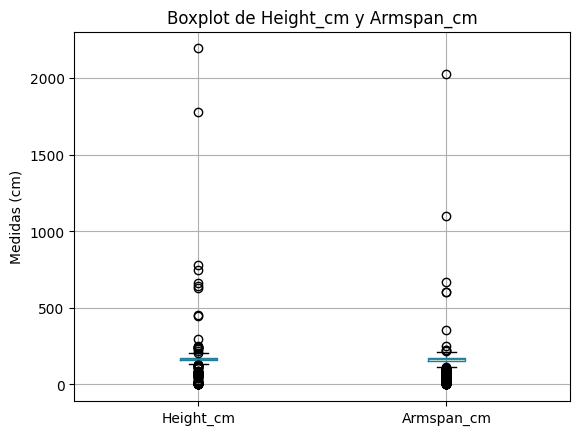

In [18]:
df_merged.boxplot(column=['Height_cm', 'Armspan_cm'])
plt.title('Boxplot de Height_cm y Armspan_cm')
plt.ylabel('Medidas (cm)')
plt.show()

Dado el anterior gráfico, en el que vemos muchos valores atipicos, la mediana podría ser nuestra mejor opción para rellenar datos de armspan_cm. Solo se le hará imputación de datos a esa columna, y solo se inputarán 9 datos nulos

In [19]:
df_merged = df_merged[(df_merged['Height_cm'] <= 252) & (df_merged['Height_cm'] >= 32)]
df_merged = df_merged[(df_merged['Armspan_cm'] <= 252) & (df_merged['Armspan_cm'] >= 32)]

In [20]:
df_merged['Armspan_cm'] = df_merged['Armspan_cm'].fillna(df_merged['Armspan_cm'].median().astype(int))
df_merged['Height_cm'] = df_merged['Height_cm'].fillna(df_merged['Height_cm'].median().astype(int))
df_merged['Armspan_cm'] = df_merged['Armspan_cm'].astype(float).round(0).astype(int)

In [21]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1510 entries, 0 to 1664
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Height_cm   1510 non-null   int64
 1   Armspan_cm  1510 non-null   int64
dtypes: int64(2)
memory usage: 35.4 KB


In [22]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1510 entries, 0 to 1664
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Height_cm   1510 non-null   int64
 1   Armspan_cm  1510 non-null   int64
dtypes: int64(2)
memory usage: 35.4 KB


In [23]:
df_merged.to_csv('../data/merged_data.csv', index=False)

**Dado que tenemos 1510 registros, eliminaremos 10 registros manualmente**